In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

import os
from pandas import DataFrame
import pandas as pd
from notebook_utils import NotebookUtilities
import matplotlib.pyplot as plt
import re
import humanize
from datetime import timedelta

nu = NotebookUtilities(data_folder_path=os.path.abspath('../data'))

In [3]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    display(df.T)

(168528, 108)


,68380,63613,140244,36843
action_type,TOOL_HOVER,TOOL_HOVER,TOOL_HOVER,S_A_L_T_WALKED
elapsed_time,390685,135132,601822,231442
event_time,2023-05-09 08:47:00,2023-05-11 10:47:00,2023-04-21 10:16:00,2023-03-07 13:33:00
session_uuid,5aca0157-02d0-4409-a4fe-f64d03fd34a1,4226ad6c-bb0a-4df0-8c4a-64c312927578,cf953248-e6cf-4544-95ce-4843d0f56f10,e3c2b4c6-d8b7-4b64-8cd0-7ca0e622f9b5
file_name,5aca0157-02d0-4409-a4fe-f64d03fd34a1,4226ad6c-bb0a-4df0-8c4a-64c312927578,max16,Marty20
logger_version,1.0,1.0,1.0,1.0
time_group,2,1,2,1
injury_record_injury_treated,True,True,True,True
injury_record_injury_treated_with_wrong_treatment,True,True,True,True
s_a_l_t_walked_sort_location,NaN,NaN,NaN,"(3.1, 0.0, -3.0)"



Preliminary Research Questions to consider for OSU Subway Bombing Data Set
1. Basic Questions

    A. Time To Hemorrhage Control for all responders

    B. Triage Efficiency (how long it take to triage the scene)

    C. Triage Accuracy (how many patients did they get right and do they do it in the right order; ie, Still or obvious life threat first (Red, Gray, Black), then wavers, then walkers last)

    D. Subgroup analyses for each of the 3 items above: Medical Students, Residents, Physicians/Faculty/Fellows, First Responders
3. Efficiency and accuracy in triage of mass casualty

    A. distance travelled and efficiency vs accuracy (ie in looking at the maps, does a small footprint correlate to efficient performance). Do novice or lower level learners go back to the same patients multiple times?

    B. Future: correlation between gaze and intent.  If learner sees bleeding, do they treat it.
4. Determination of triage decisiveness, hover or bag open as an indicator (ie does a novice learner (medical student) open the bag or hover more than a more experienced learner (physician).
5. Are all mass casualty tasks similar in difficulty (wound packing, needle decompression, tourniquet application, triage tag determination) based on time spent.
6. Additional Metrics

    A. Performance
        
        1. Number of patients engaged (this could be including the ones that wave, walk, put hands up)
        2. Number of patients treated
        3. Time to first treatment
        4. Patient accuracy rate (how many patients correct / number of patients treated)
        5. Number of pulses taken by number of patients treated
        6. Treatment placement error (how far is treatment applied to location of wound. Zero would correspond to placing the treatment exactly on the wound)
    
    B. Scene Efficiency
    
        1. How many patients are treated between walk / hear commands
        2. Total number of teleports
        3. Total user actions taken
        4. Average time between user actions
        5. Interactions per patient

    C. Communication / Interaction
        1. How many times are walk / hear command issued
        2. What is the average time between walk / hear commands
        3. Number of voice captures per session (would be interesting to see if this correlates with anything)
        4. Voice capture content (themes of what they are saying)
8. Conditions to Analyze by

    A. Analyze results by which triage method deployed (SALT, START) if that can be distinguished
9. Questions

    A. Is low time to first treatment associated with higher performance?

    B. Are those that talk more, less efficient, lower performance?

    C. Are those that have lower average time between actions, higher in performance?

In [4]:

columns_list = [cn for cn in frvrs_logs_df.columns if 'treat' in cn]
logger_version = 1.3
used_list = []
for cn in columns_list:
    mask_series = ~frvrs_logs_df[cn].isnull() & (frvrs_logs_df.logger_version == logger_version)
    record_count = frvrs_logs_df[mask_series].shape[0]
    if record_count:
        print(cn)
        display(frvrs_logs_df[mask_series].sample(min(4, record_count)).dropna(axis='columns', how='all').T)
        used_list.append(cn)
used_list = list(set(columns_list) - set(used_list))
print(f"Logger version {logger_version} doesn't seem to use the treatment Boolean columns ({nu.conjunctify_nouns(used_list)}).")

injury_record_injury_treated


,159569,161569,151153,159466
action_type,PLAYER_LOCATION,TOOL_HOVER,TOOL_HOVER,TOOL_HOVER
elapsed_time,14006,40829,92576,297738
event_time,2023-09-11 10:10:36,2023-09-11 13:03:28,2023-09-11 12:47:17,2023-09-07 12:12:24
session_uuid,b11f14c2-8de9-4247-9753-1434cb392804,d0f826d3-a6db-4a6a-9ceb-5e17e3ff3d17,2a5106e4-984c-42a7-9edd-2fb3e6325d10,b0f6e371-e548-4e1d-adc1-92891a6ca6ca
file_name,b11f14c2-8de9-4247-9753-1434cb392804,d0f826d3-a6db-4a6a-9ceb-5e17e3ff3d17,2a5106e4-984c-42a7-9edd-2fb3e6325d10,b0f6e371-e548-4e1d-adc1-92891a6ca6ca
logger_version,1.3,1.3,1.3,1.3
time_group,1,1,1,2
injury_record_injury_treated,True,True,True,True
injury_record_injury_treated_with_wrong_treatment,True,True,True,True
tool_hover_type,NaN,Hemostatic Gauze,Hemostatic Gauze,Tourniquet


injury_record_injury_treated_with_wrong_treatment


,167027,163968,150592,166628
action_type,TOOL_HOVER,PLAYER_LOCATION,TOOL_HOVER,TAG_APPLIED
elapsed_time,252195,125203,80359,379371
event_time,2023-09-07 15:37:24,2023-09-11 13:47:10,2023-09-11 12:47:04,2023-09-07 14:01:43
session_uuid,f8b5cbd1-0abe-483b-8b16-956044dc0119,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,2a5106e4-984c-42a7-9edd-2fb3e6325d10,ebc4fb38-01c3-4296-b22d-34adf70e0d43
file_name,f8b5cbd1-0abe-483b-8b16-956044dc0119,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,2a5106e4-984c-42a7-9edd-2fb3e6325d10,ebc4fb38-01c3-4296-b22d-34adf70e0d43
logger_version,1.3,1.3,1.3,1.3
time_group,1,1,1,1
injury_record_injury_treated,True,True,True,True
injury_record_injury_treated_with_wrong_treatment,True,True,True,True
tool_hover_type,Tourniquet,NaN,Gauze,NaN


injury_treated_id


,159249,163400,165724,152493
action_type,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED
elapsed_time,79962,50890,334060,78875
event_time,2023-09-07 12:08:46,2023-09-11 13:45:56,2023-09-11 13:50:39,2023-09-11 09:43:01
session_uuid,b0f6e371-e548-4e1d-adc1-92891a6ca6ca,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,2faaa766-35d7-4fff-910c-f7b044bb913b
file_name,b0f6e371-e548-4e1d-adc1-92891a6ca6ca,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,2faaa766-35d7-4fff-910c-f7b044bb913b
logger_version,1.3,1.3,1.3,1.3
time_group,1,1,1,1
injury_record_injury_treated,True,True,True,True
injury_record_injury_treated_with_wrong_treatment,True,True,True,True
injury_treated_id,L Thigh Laceration,R Shin Amputation,R Thigh Laceration,R Side Puncture


injury_treated_patient_id


,168316,168342,154017,158877
action_type,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED
elapsed_time,72094,77593,122262,98670
event_time,2023-09-07 08:55:11,2023-09-07 08:55:16,2023-09-07 15:29:31,2023-09-07 13:51:27
session_uuid,ff4c3532-5924-45b6-9a6a-d0d3274b6ef0,ff4c3532-5924-45b6-9a6a-d0d3274b6ef0,666ce61c-2ebc-40ee-902e-6f6aa42801ad,b06475e0-5ddd-4ff8-ba82-abf5331d6c9c
file_name,ff4c3532-5924-45b6-9a6a-d0d3274b6ef0,ff4c3532-5924-45b6-9a6a-d0d3274b6ef0,666ce61c-2ebc-40ee-902e-6f6aa42801ad,b06475e0-5ddd-4ff8-ba82-abf5331d6c9c
logger_version,1.3,1.3,1.3,1.3
time_group,1,1,1,1
injury_record_injury_treated,True,True,True,True
injury_record_injury_treated_with_wrong_treatment,True,True,True,True
injury_treated_id,L Shoulder Puncture,R Side Puncture,R Side Puncture,R Side Puncture


injury_treated_required_procedure


,165857,166419,152435,160660
action_type,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED
elapsed_time,361228,102789,71193,365951
event_time,2023-09-11 13:51:06,2023-09-07 13:57:06,2023-09-11 09:42:53,2023-09-11 10:16:28
session_uuid,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,ebc4fb38-01c3-4296-b22d-34adf70e0d43,2faaa766-35d7-4fff-910c-f7b044bb913b,b11f14c2-8de9-4247-9753-1434cb392804
file_name,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,ebc4fb38-01c3-4296-b22d-34adf70e0d43,2faaa766-35d7-4fff-910c-f7b044bb913b,b11f14c2-8de9-4247-9753-1434cb392804
logger_version,1.3,1.3,1.3,1.3
time_group,1,1,1,2
injury_record_injury_treated,True,True,True,True
injury_record_injury_treated_with_wrong_treatment,True,True,True,True
injury_treated_id,L Forearm Laceration,L Neck Puncture,L Bicep Puncture,R Shin Amputation


injury_treated_severity


,156526,149917,152527,159197
action_type,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED
elapsed_time,238491,252281,82635,49059
event_time,2023-09-11 14:21:10,2023-09-07 14:45:48,2023-09-11 09:43:05,2023-09-07 12:08:15
session_uuid,a3d6d913-7755-4e8d-a174-d5e491c4eac7,0b630a14-5acd-4e11-99df-8f59d804f807,2faaa766-35d7-4fff-910c-f7b044bb913b,b0f6e371-e548-4e1d-adc1-92891a6ca6ca
file_name,a3d6d913-7755-4e8d-a174-d5e491c4eac7,0b630a14-5acd-4e11-99df-8f59d804f807,2faaa766-35d7-4fff-910c-f7b044bb913b,b0f6e371-e548-4e1d-adc1-92891a6ca6ca
logger_version,1.3,1.3,1.3,1.3
time_group,1,1,1,1
injury_record_injury_treated,True,True,True,True
injury_record_injury_treated_with_wrong_treatment,True,True,True,True
injury_treated_id,L Thigh Laceration,R Side Puncture,L Shoulder Puncture,L Shoulder Puncture


injury_treated_body_region


,153567,159375,159185,153451
action_type,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED
elapsed_time,256724,194185,38762,236131
event_time,2023-09-07 12:47:27,2023-09-07 12:10:40,2023-09-07 12:08:05,2023-09-07 12:47:07
session_uuid,384462fc-969c-42cd-944f-726634faba4f,b0f6e371-e548-4e1d-adc1-92891a6ca6ca,b0f6e371-e548-4e1d-adc1-92891a6ca6ca,384462fc-969c-42cd-944f-726634faba4f
file_name,384462fc-969c-42cd-944f-726634faba4f,b0f6e371-e548-4e1d-adc1-92891a6ca6ca,b0f6e371-e548-4e1d-adc1-92891a6ca6ca,384462fc-969c-42cd-944f-726634faba4f
logger_version,1.3,1.3,1.3,1.3
time_group,1,2,1,1
injury_record_injury_treated,True,True,True,True
injury_record_injury_treated_with_wrong_treatment,True,True,True,True
injury_treated_id,L Thigh Laceration,L Neck Puncture,L Bicep Puncture,L Shoulder Puncture


injury_treated_injury_treated


,165343,153775,158292,159250
action_type,PLAYER_GAZE,PLAYER_GAZE,S_A_L_T_WAVE_IF_CAN,TOOL_APPLIED
elapsed_time,277825,42042,942354,79962
event_time,2023-09-11 13:49:43,2023-09-07 15:28:11,2023-09-11 14:32:54,2023-09-07 12:08:46
session_uuid,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,666ce61c-2ebc-40ee-902e-6f6aa42801ad,a3d6d913-7755-4e8d-a174-d5e491c4eac7,b0f6e371-e548-4e1d-adc1-92891a6ca6ca
file_name,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,666ce61c-2ebc-40ee-902e-6f6aa42801ad,a3d6d913-7755-4e8d-a174-d5e491c4eac7,b0f6e371-e548-4e1d-adc1-92891a6ca6ca
logger_version,1.3,1.3,1.3,1.3
time_group,1,1,2,1
injury_record_injury_treated,True,True,True,True
injury_record_injury_treated_with_wrong_treatment,True,True,True,True
s_a_l_t_wave_if_can_sort_location,NaN,NaN,"(-4.2, 0.2, -21.5)",NaN


injury_treated_injury_treated_with_wrong_treatment


,158190,154076,161890,158451
action_type,TOOL_SELECTED,S_A_L_T_WALK_IF_CAN,PLAYER_LOCATION,SESSION_START
elapsed_time,774426,136409,71121,12685
event_time,2023-09-11 14:30:06,2023-09-07 15:29:45,2023-09-11 13:03:58,2023-09-07 13:50:02
session_uuid,a3d6d913-7755-4e8d-a174-d5e491c4eac7,666ce61c-2ebc-40ee-902e-6f6aa42801ad,d0f826d3-a6db-4a6a-9ceb-5e17e3ff3d17,b06475e0-5ddd-4ff8-ba82-abf5331d6c9c
file_name,a3d6d913-7755-4e8d-a174-d5e491c4eac7,666ce61c-2ebc-40ee-902e-6f6aa42801ad,d0f826d3-a6db-4a6a-9ceb-5e17e3ff3d17,b06475e0-5ddd-4ff8-ba82-abf5331d6c9c
logger_version,1.3,1.3,1.3,1.3
time_group,2,1,1,1
injury_record_injury_treated,True,True,True,True
injury_record_injury_treated_with_wrong_treatment,True,True,True,True
s_a_l_t_walk_if_can_sort_location,NaN,"(0.0, 0.1, 4.1)",NaN,NaN


injury_treated_injury_injury_locator


,150084,153451,151569,151981
action_type,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED
elapsed_time,264627,236131,128727,238653
event_time,2023-09-07 14:46:00,2023-09-07 12:47:07,2023-09-11 12:47:53,2023-09-11 12:49:43
session_uuid,0b630a14-5acd-4e11-99df-8f59d804f807,384462fc-969c-42cd-944f-726634faba4f,2a5106e4-984c-42a7-9edd-2fb3e6325d10,2a5106e4-984c-42a7-9edd-2fb3e6325d10
file_name,0b630a14-5acd-4e11-99df-8f59d804f807,384462fc-969c-42cd-944f-726634faba4f,2a5106e4-984c-42a7-9edd-2fb3e6325d10,2a5106e4-984c-42a7-9edd-2fb3e6325d10
logger_version,1.3,1.3,1.3,1.3
time_group,1,1,1,2
injury_record_injury_treated,True,True,True,True
injury_record_injury_treated_with_wrong_treatment,True,True,True,True
injury_treated_id,L Thigh Laceration,L Shoulder Puncture,L Shoulder Puncture,R Shin Amputation


Logger version 1.3 doesn't seem to use the treatment Boolean columns ().


In [5]:

# Patient accuracy rate (how many patients correct / number of patients treated)
rows_list = []
for (session_uuid, time_group), df1 in nu.get_session_groupby(extra_column='time_group'):
    logger_version = df1.logger_version.unique().item()
    total_mask = (df1.injury_treated_injury_treated == True)
    df2 = df1[total_mask]
    total_treated = df2.shape[0]
    if total_treated:
        correct_mask = (df2.injury_treated_injury_treated_with_wrong_treatment == False)
        correctly_treated = df2[correct_mask].shape[0]
    else:
        total_mask = (df1.injury_record_injury_treated == True)
        df2 = df1[total_mask]
        total_treated = df2.shape[0]
        if total_treated:
            correct_mask = (df2.injury_record_injury_treated_with_wrong_treatment == False)
            correctly_treated = df2[correct_mask].shape[0]
    if total_treated:
        row_dict = {}
        row_dict['logger_version'] = logger_version
        row_dict['session_uuid'] = session_uuid
        row_dict['time_group'] = time_group
        row_dict['total_treated'] = total_treated
        row_dict['correctly_treated'] = correctly_treated
        row_dict['patient_accuracy_rate'] = correctly_treated / total_treated
        rows_list.append(row_dict)
patient_accuracy_rate_df = DataFrame(rows_list)

In [6]:

patient_accuracy_rate_df.sort_values('patient_accuracy_rate')

,logger_version,session_uuid,time_group,total_treated,correctly_treated,patient_accuracy_rate
0,1.0,04882754-51a0-4e5b-9617-b200e3609116,0,4,0,0.000000
346,1.0,d347b967-5e20-4527-95dd-3a0fdf73af1d,0,3,0,0.000000
146,1.3,666ce61c-2ebc-40ee-902e-6f6aa42801ad,0,41,0,0.000000
148,1.0,6774cf2a-7728-4387-8788-934246a1e906,0,4,0,0.000000
344,1.0,d2e4a5df-fd46-47d5-923f-089f1ee4e1ec,0,14,0,0.000000
...,...,...,...,...,...,...
26,1.0,0b891add-e0c3-463d-948d-7f491f1d10ef,5,329,8,0.024316
267,1.0,a0987257-801e-44c5-a1ad-81e0083bfa46,6,353,9,0.025496
408,1.0,ee8a8276-1a9c-41fd-a793-a3eb6d337ff7,1,156,4,0.025641
155,1.0,6925e2d8-3f2b-443d-8e59-7bac6684464d,1,156,4,0.025641


In [7]:

mask_series = (patient_accuracy_rate_df.logger_version == 1.3)
patient_accuracy_rate_df[mask_series].shape

(40, 6)

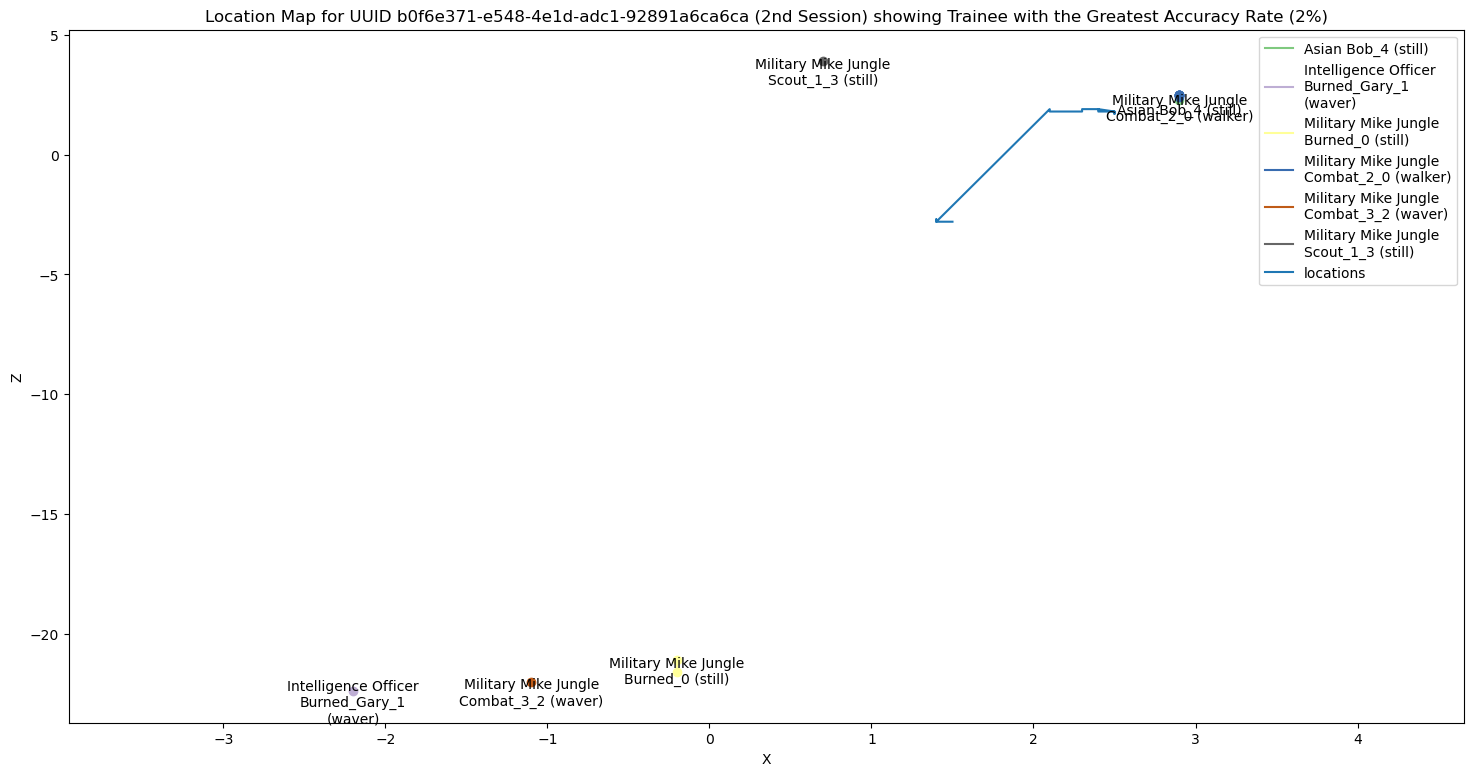

In [8]:

# Get time group with the greatest accuracy rate, v1.3
mask_series = (patient_accuracy_rate_df.logger_version == 1.3)
df = patient_accuracy_rate_df[mask_series].sort_values(['patient_accuracy_rate', 'correctly_treated']).tail(1)
if df.shape[0]:
    session_uuid = df.session_uuid.squeeze()
    time_group = df.time_group.squeeze()
    base_mask_series = (frvrs_logs_df.session_uuid == session_uuid) & (frvrs_logs_df.time_group == time_group)
    
    title = f'Location Map for UUID {session_uuid} ({humanize.ordinal(time_group+1)} Session)'
    title += ' showing Trainee with the Greatest Accuracy Rate ('
    patient_accuracy_rate = df.patient_accuracy_rate.min()
    title += humanize.intword(100 * patient_accuracy_rate, format='%d') + '%)'
    nu.visualize_player_movement(base_mask_series, title=title, frvrs_logs_df=frvrs_logs_df)

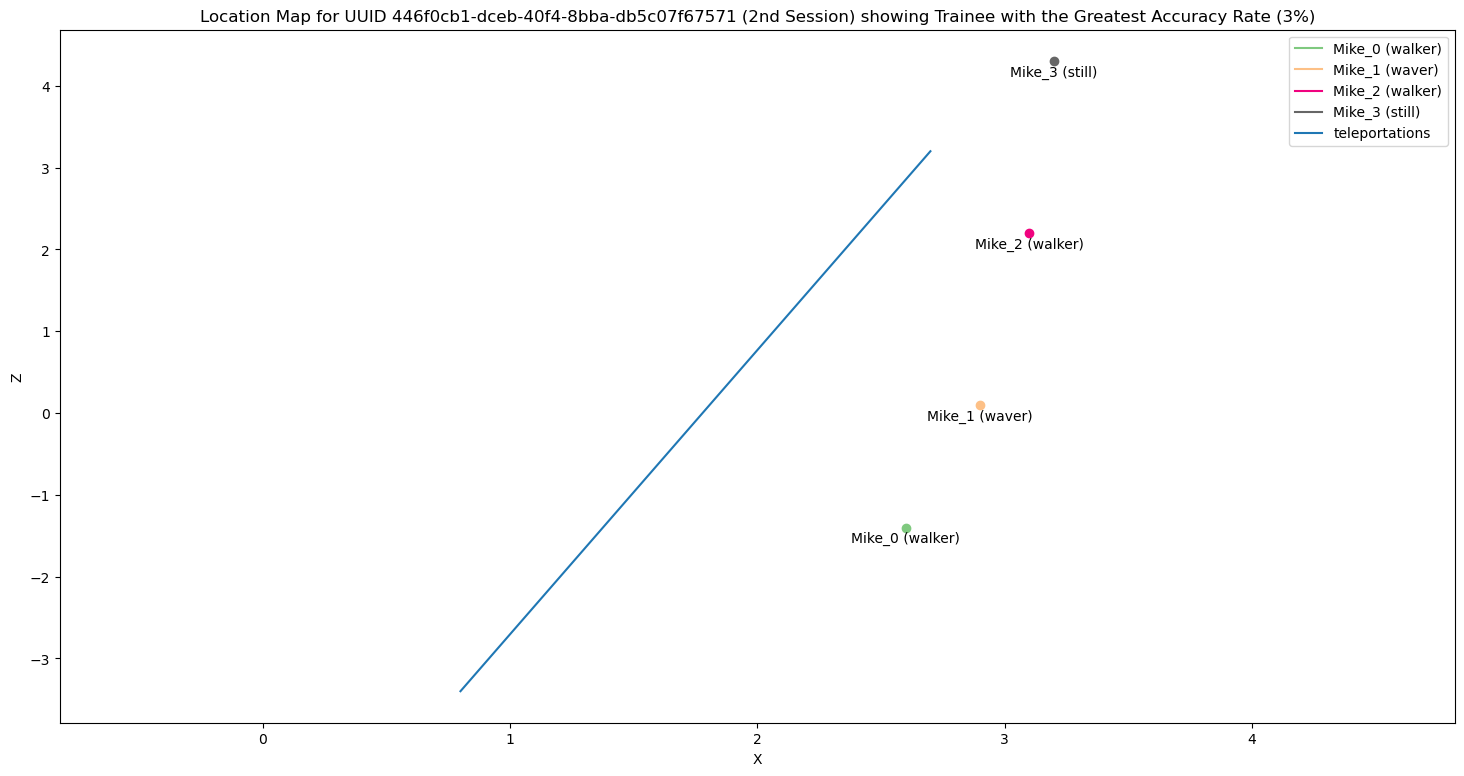

In [9]:

# Get time group with the greatest accuracy rate, v1.0
mask_series = (patient_accuracy_rate_df.logger_version == 1.0)
df = patient_accuracy_rate_df[mask_series].sort_values(['patient_accuracy_rate', 'correctly_treated']).tail(1)
if df.shape[0]:
    session_uuid = df.session_uuid.squeeze()
    time_group = df.time_group.squeeze()
    base_mask_series = (frvrs_logs_df.session_uuid == session_uuid) & (frvrs_logs_df.time_group == time_group)
    
    title = f'Location Map for UUID {session_uuid} ({humanize.ordinal(time_group+1)} Session)'
    title += ' showing Trainee with the Greatest Accuracy Rate ('
    patient_accuracy_rate = df.patient_accuracy_rate.min()
    title += humanize.intword(100 * patient_accuracy_rate, format='%d') + '%)'
    nu.visualize_player_movement(base_mask_series, title=title, frvrs_logs_df=frvrs_logs_df, verbose=False)

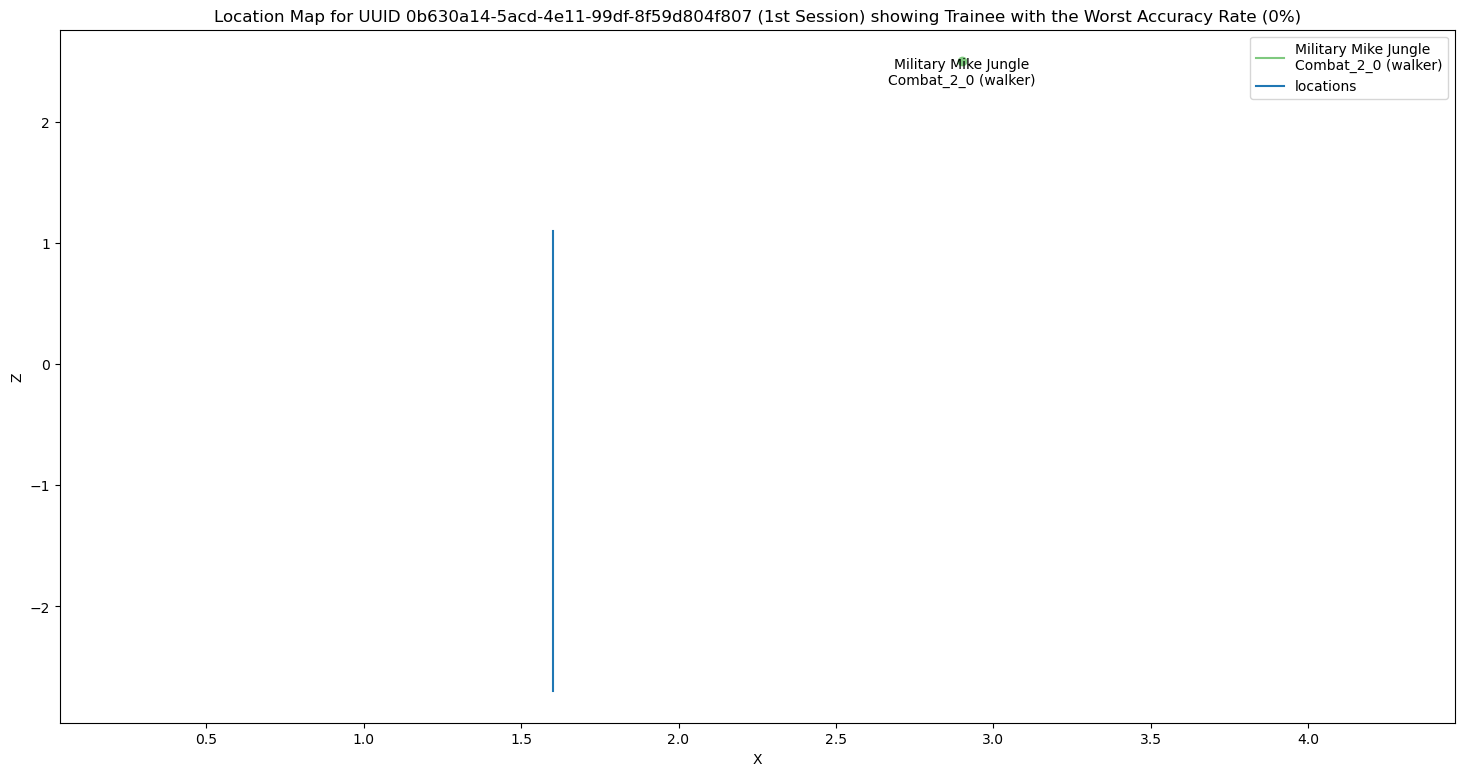

In [10]:

# Get time group with the worst accuracy rate, v1.3
mask_series = (patient_accuracy_rate_df.logger_version == 1.3)
df = patient_accuracy_rate_df[mask_series].sort_values(
    ['patient_accuracy_rate', 'correctly_treated'], ascending=[True, False]
).head(1)
if df.shape[0]:
    session_uuid = df.session_uuid.squeeze()
    time_group = df.time_group.squeeze()
    base_mask_series = (frvrs_logs_df.session_uuid == session_uuid) & (frvrs_logs_df.time_group == time_group)
    
    title = f'Location Map for UUID {session_uuid} ({humanize.ordinal(time_group+1)} Session)'
    title += ' showing Trainee with the Worst Accuracy Rate ('
    patient_accuracy_rate = df.patient_accuracy_rate.min()
    title += humanize.intword(100 * patient_accuracy_rate, format='%d') + '%)'
    nu.visualize_player_movement(base_mask_series, title=title, frvrs_logs_df=frvrs_logs_df)

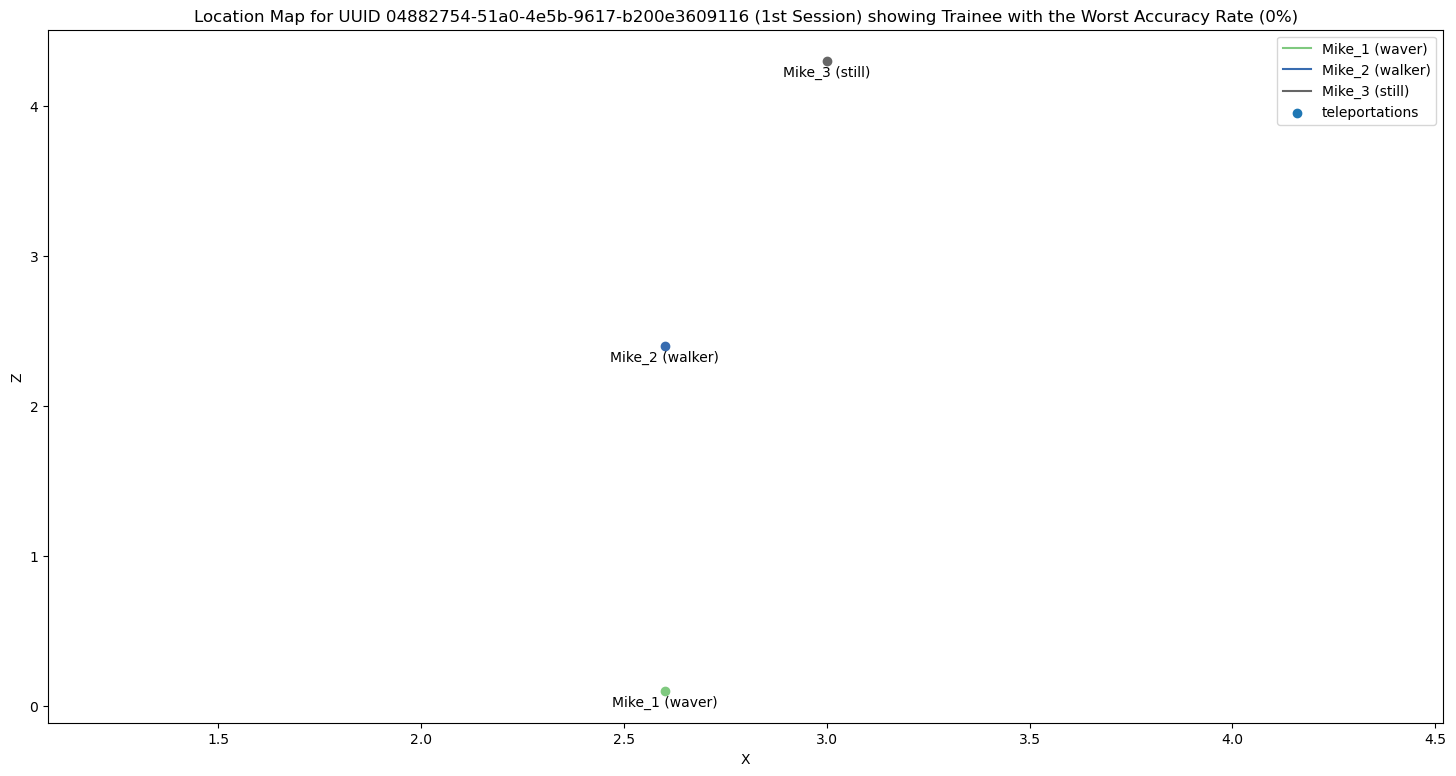

In [11]:

# Get time group with the worst accuracy rate, v1.0
mask_series = (patient_accuracy_rate_df.logger_version == 1.0)
df = patient_accuracy_rate_df[mask_series].sort_values(
    ['patient_accuracy_rate', 'correctly_treated'], ascending=[True, False]
).head(1)
if df.shape[0]:
    session_uuid = df.session_uuid.squeeze()
    time_group = df.time_group.squeeze()
    base_mask_series = (frvrs_logs_df.session_uuid == session_uuid) & (frvrs_logs_df.time_group == time_group)
    
    title = f'Location Map for UUID {session_uuid} ({humanize.ordinal(time_group+1)} Session)'
    title += ' showing Trainee with the Worst Accuracy Rate ('
    patient_accuracy_rate = df.patient_accuracy_rate.min()
    title += humanize.intword(100 * patient_accuracy_rate, format='%d') + '%)'
    nu.visualize_player_movement(base_mask_series, title=title, frvrs_logs_df=frvrs_logs_df)